In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cancer = pd.read_csv(r"D:\Personal Projects\cancer issue.csv")
cancer.head()

,PatientID,Age,Gender,Race/Ethnicity,BMI,SmokingStatus,FamilyHistory,CancerType,Stage,TumorSize,TreatmentType,TreatmentResponse,SurvivalMonths,Recurrence,GeneticMarker,HospitalRegion
0,1,80,Female,Other,23.3,Smoker,Yes,Breast,II,1.7,Combination Therapy,No Response,103,Yes,NaN,South
1,2,76,Male,Caucasian,22.4,Former Smoker,Yes,Colon,IV,4.7,Surgery,No Response,14,Yes,BRCA1,West
2,3,69,Male,Asian,21.5,Smoker,Yes,Breast,III,8.3,Combination Therapy,Complete Remission,61,Yes,BRCA1,West
3,4,77,Male,Asian,30.4,Former Smoker,Yes,Prostate,II,1.7,Radiation,Partial Remission,64,No,KRAS,South
4,5,89,Male,Caucasian,20.9,Smoker,Yes,Lung,IV,7.4,Radiation,No Response,82,Yes,KRAS,South


In [3]:
cancer = cancer.drop('PatientID', axis = 1)

#### Categorical Variable: 1.Gender, 2.Race, 3.SmokingStatus, 4.FamilyHistory, 5.CancerType, 6.Stage, 7.TreatmentType, 8.TreatmentResponse, 9.Recurrence, 10.GeneticMaker, 11. HospitalRegion
#### Continuous Variable: 1. Age, 2.BMI, 3.TumerSize, 4.SurvivalMonths

In [4]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17686 entries, 0 to 17685
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                17686 non-null  int64  
 1   Gender             17686 non-null  object 
 2   Race/Ethnicity     17686 non-null  object 
 3   BMI                17686 non-null  float64
 4   SmokingStatus      17686 non-null  object 
 5   FamilyHistory      17686 non-null  object 
 6   CancerType         17686 non-null  object 
 7   Stage              17686 non-null  object 
 8   TumorSize          17686 non-null  float64
 9   TreatmentType      17686 non-null  object 
 10  TreatmentResponse  17686 non-null  object 
 11  SurvivalMonths     17686 non-null  int64  
 12  Recurrence         17686 non-null  object 
 13  GeneticMarker      13360 non-null  object 
 14  HospitalRegion     17686 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 2.0+ MB


#### Total rows 17686 and total columns 16. Only GeneticMaker column contains missing values.

## Filling missing value by most frequent value

In [5]:
cancer['GeneticMarker'].fillna('Not Taken', inplace=True) 

In [6]:
cancer['GeneticMarker'].isnull().sum()

0

In [7]:
cancer['GeneticMarker'].mode()[0]

'BRCA1'

In [8]:
cancer['GeneticMarker'].value_counts()

GeneticMarker
BRCA1        4478
EGFR         4459
KRAS         4423
Not Taken    4326
Name: count, dtype: int64

In [9]:
cancer.to_csv('cancer_issue_cleaned.csv', index = False)

## Univariate Analysis

#### Frequency distribution for categorical variables

In [10]:
categorical_variables = ['Gender', 'Race/Ethnicity', 'SmokingStatus', 'FamilyHistory', 'CancerType', 'Stage', 'TreatmentType',
                         'TreatmentResponse', 'Recurrence', 'GeneticMarker', 'HospitalRegion']

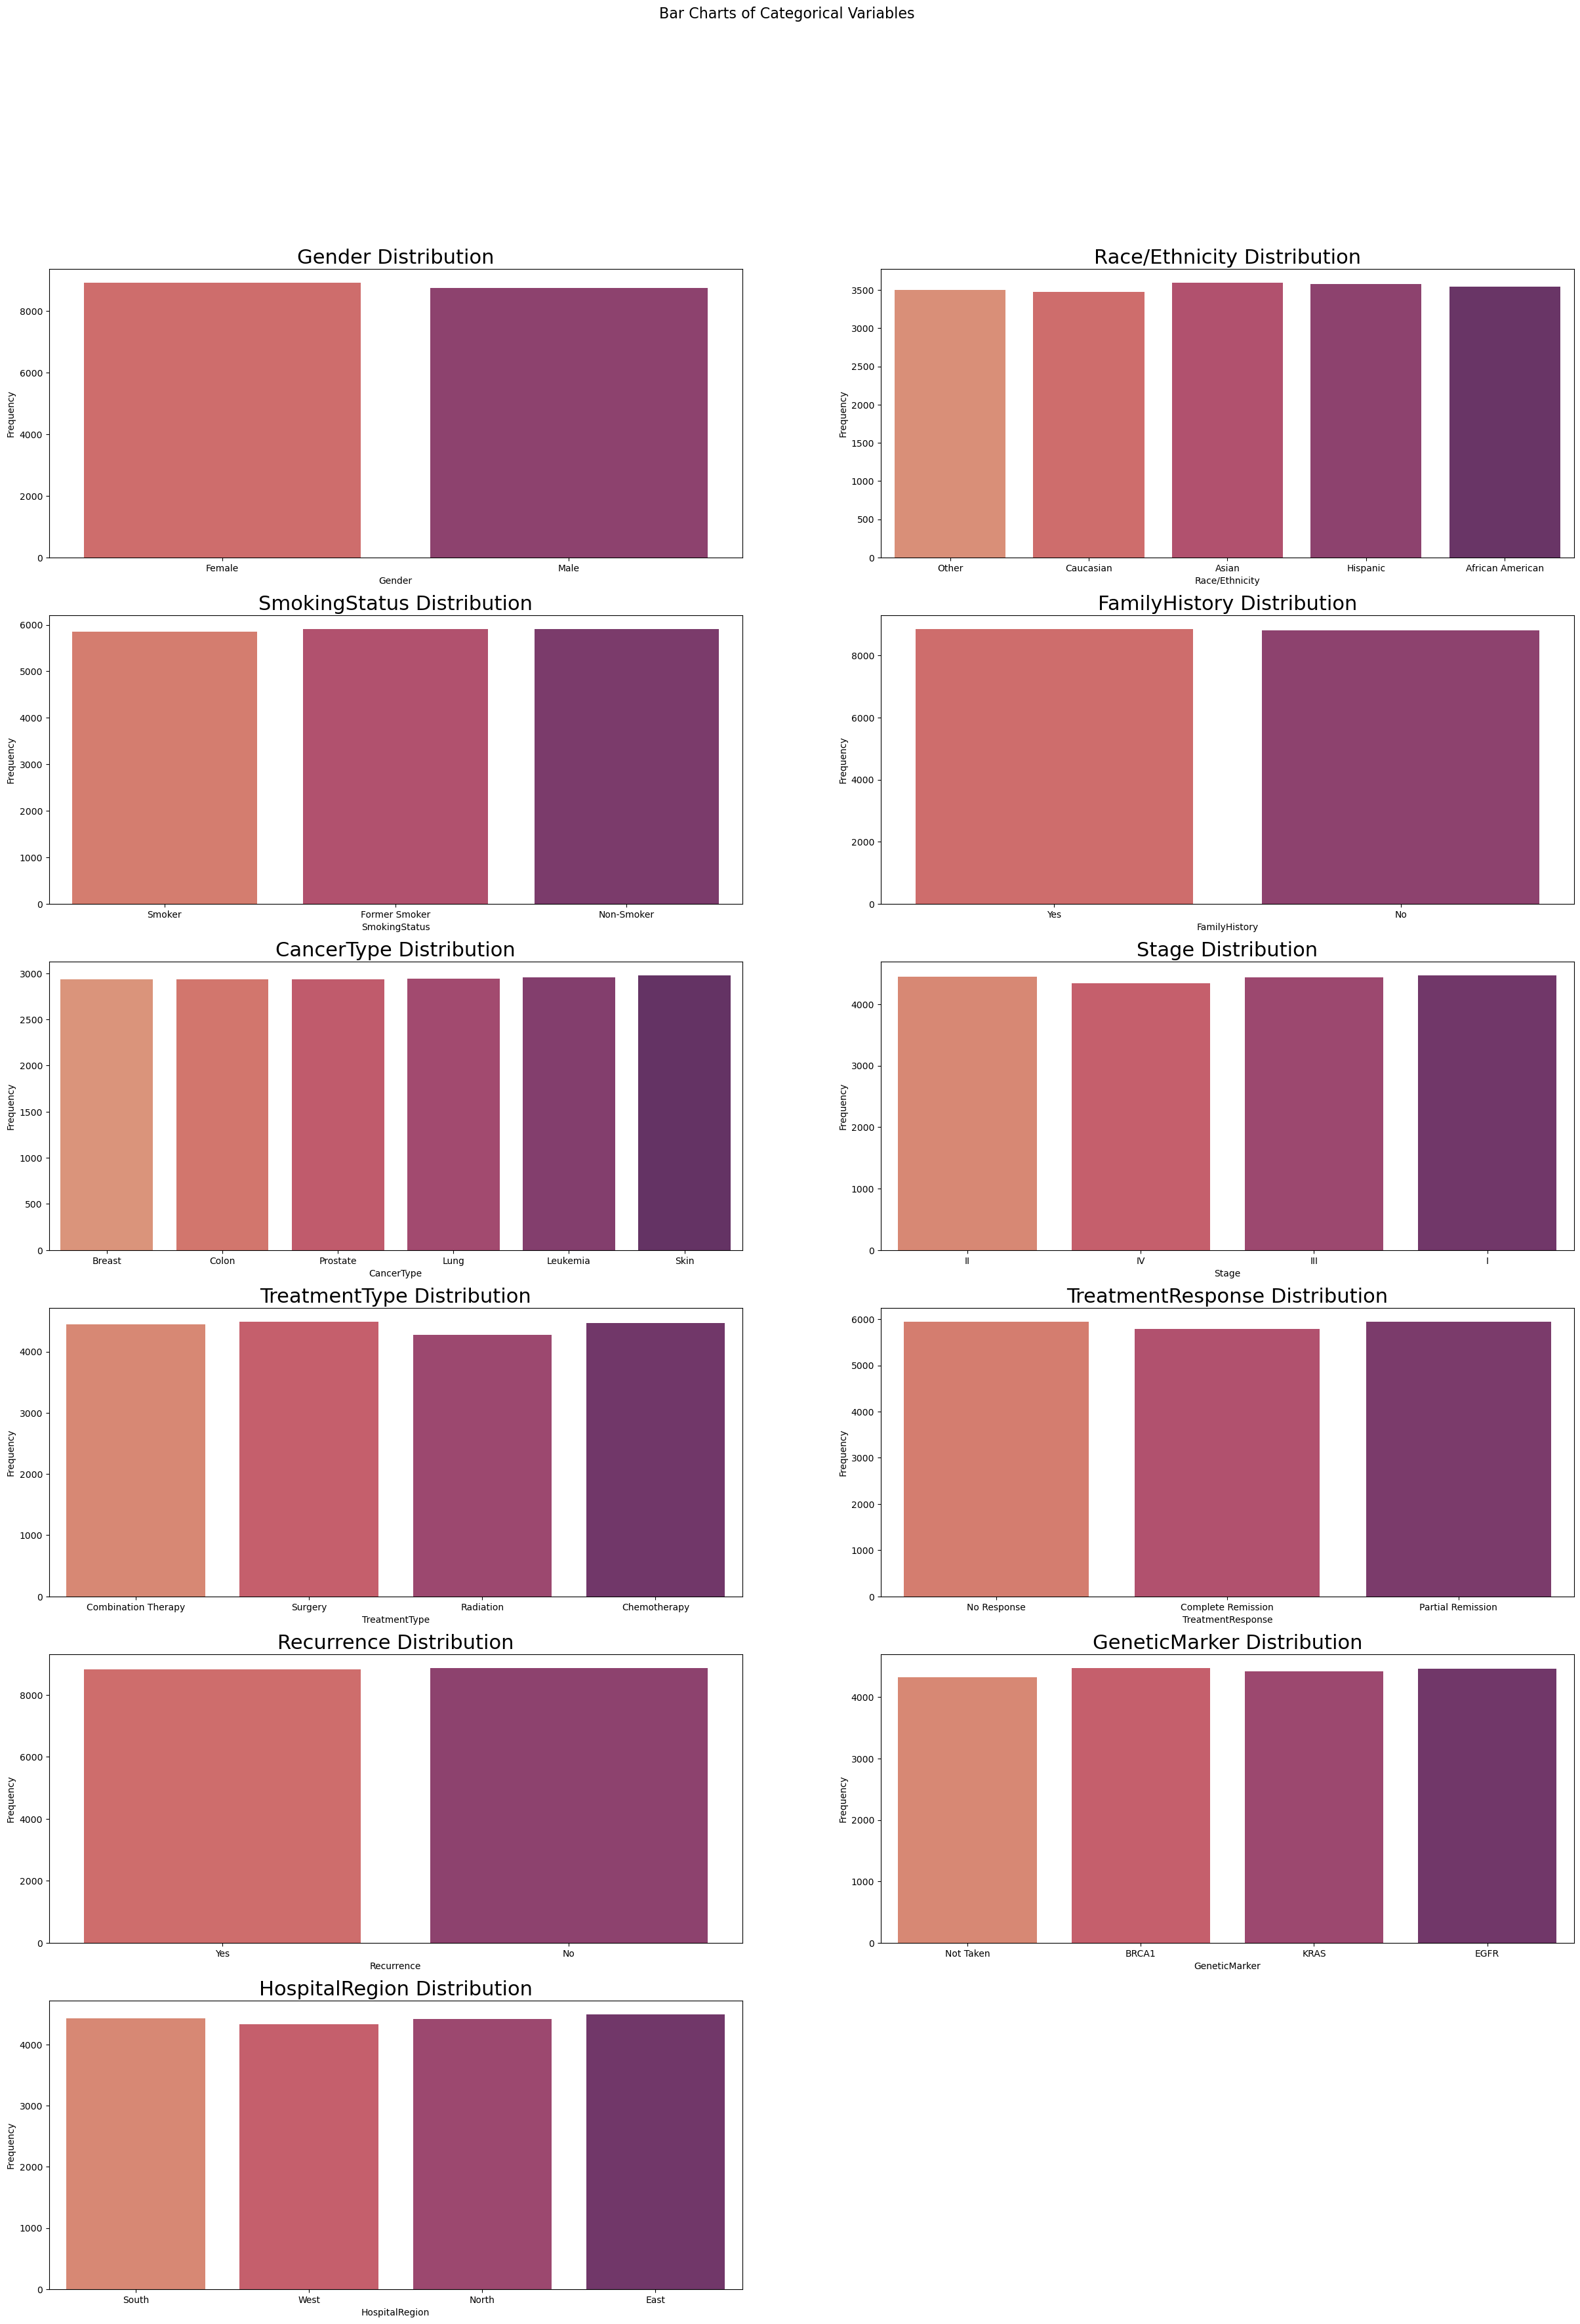

In [11]:
# Set up the number of rows and columns for subplots
n_cols = 2
n_rows = (len(categorical_variables) + n_cols - 1) // n_cols

# Create a figure with increased size
plt.figure(figsize=(30, 40))

# Plot each categorical variable
for i, column in enumerate(categorical_variables):
    plt.subplot(n_rows, n_cols, i+1)  
    sns.countplot(x=cancer[column], palette="flare") 
    plt.title(f'{column} Distribution', fontsize=22)
    plt.ylabel('Frequency', fontsize=10)

plt.suptitle('Bar Charts of Categorical Variables', fontsize=16)  
plt.show()

#### The categorical variables, such as Gender, Race, and others, exhibit a nearly equal distribution of values across their respective categories. The only exception is the 'GeneticMarker' variable, which shows a distinct distribution.


#### Descriptive statistics for numeric variables

In [12]:
cancer.describe()

,Age,BMI,TumorSize,SurvivalMonths
count,17686.000000,17686.000000,17686.000000,17686.000000
mean,53.758396,29.253805,5.499751,60.387821
std,21.079473,6.203575,2.603107,34.794859
min,18.000000,18.500000,1.000000,1.000000
25%,35.000000,23.900000,3.300000,30.000000
50%,54.000000,29.200000,5.500000,60.000000
75%,72.000000,34.600000,7.700000,91.000000
max,90.000000,40.000000,10.000000,120.000000


#### The data of cancer-affected patients reveals that the average age of a cancer patient is almost 54 years, with a wide age range as indicated by the standard deviation of 21.08 years. The average BMI of the patients is 29.25, showing moderate variation. Tumor sizes have an average of 5.50 cm, with some variability. The average survival time is approximately 60 months, but the large standard deviation of 34.79 months suggests that survival durations vary significantly among patients. This indicates diverse characteristics and outcomes within the patient group.